In [1]:
#this is an example of bad use of linear regression cause i'm trying to predict a value of 0 or 1
#a logistic regression model would be the best fit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
ds = load_breast_cancer()
ds.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
X = pd.DataFrame(data=ds['data'],columns=ds['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
y = pd.DataFrame(data=ds['target'],columns=['has'] )
y.head(2)

,has
0,0
1,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lm.coef_

array([[ 1.43010648e-01, -2.50631005e-04, -1.41522538e-02,
        -2.00057331e-04,  2.40468745e+00,  3.87915206e+00,
        -1.42527807e+00, -1.80176174e+00, -1.38869744e+00,
         5.83835123e-01, -1.07688524e+00,  5.26039695e-03,
         1.08770809e-01,  6.24522296e-04, -7.02053417e+00,
        -3.07561421e-01,  4.51726910e+00, -1.19801019e+01,
        -4.05423999e+00,  5.77142232e+00, -1.62019838e-01,
        -9.92028077e-03, -5.35536833e-04,  9.85294064e-04,
        -2.00583270e+00, -1.24051666e-01, -4.78775586e-01,
        -8.83535548e-01,  7.32370887e-02, -3.39184681e+00]])

In [14]:
lm.intercept_

array([2.91311843])

In [15]:
coeficients = pd.DataFrame(data=lm.coef_[0],index=X.columns,columns=['Coef'])
coeficients

,Coef
mean radius,0.143011
mean texture,-0.000251
mean perimeter,-0.014152
mean area,-0.000200
mean smoothness,2.404687
mean compactness,3.879152
mean concavity,-1.425278
mean concave points,-1.801762
mean symmetry,-1.388697
mean fractal dimension,0.583835


In [16]:
predictions = lm.predict(X_test)

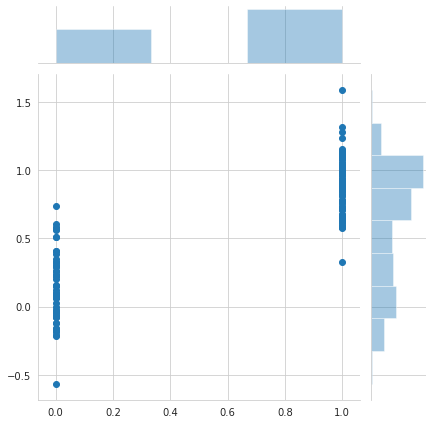

In [17]:
sns.jointplot(y_test,predictions)

In [18]:
from sklearn import metrics

In [19]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  0.20267299822047144
MSE:  0.06643385360594369
RMSE:  0.2577476548990188
